In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from glob import glob
%matplotlib inline

In [2]:
# load filenames for human and dog images
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total dog images.' % len(dog_files))

There are 8351 total dog images.


In [40]:
train_data = pd.DataFrame([(x.split('/')[3], x.split('/')[4].split(".")[0])
                           for x in dog_files if x.split('/')[3].startswith('train')],
                          columns=['data', 'breed'])

In [41]:
distribution = train_data.groupby('breed').size().to_frame().rename(columns={0:'counts'})
distribution['%'] = np.round(distribution['counts']/ train_data.shape[0]*100, 2)

In [60]:
distribution['%'].describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.95]).to_frame().T

,count,mean,std,min,25%,50%,75%,85%,95%,max
%,133.0,0.751203,0.177756,0.39,0.63,0.75,0.91,0.96,1.012,1.15


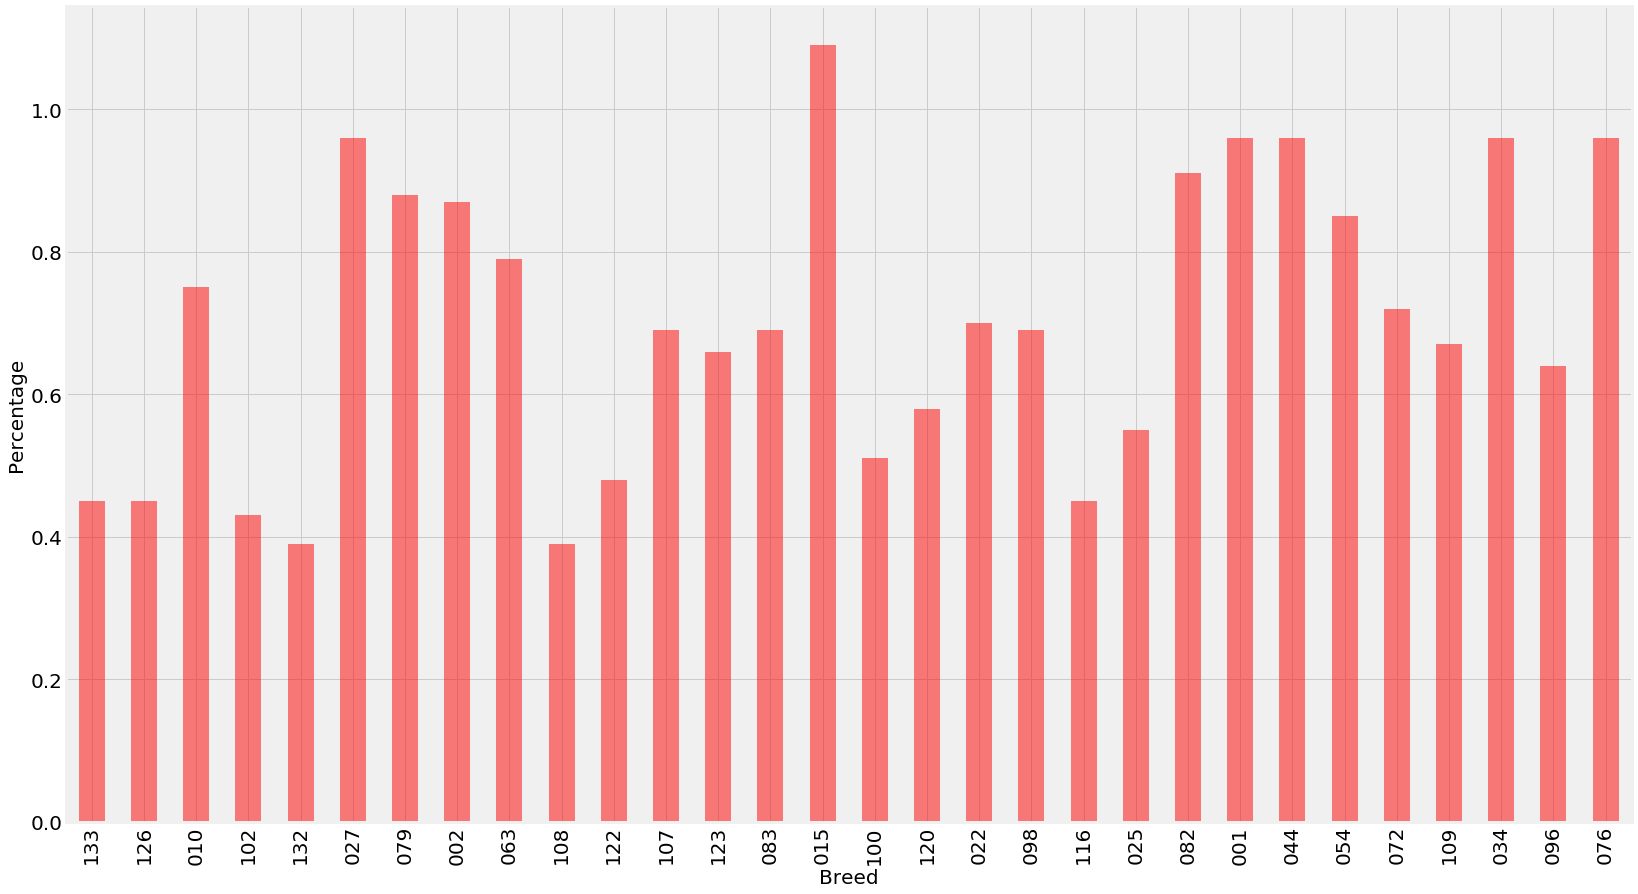

In [43]:
fig, ax = plt.subplots(figsize=(25, 15))
distribution['%'].sort_values(ascending=False).sample(30).plot(kind='bar',
                                                                  color='r',
                                                                  alpha=0.5,
                                                                  ax=ax)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Breed', fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.savefig('Sample_Breed_Distribution.png')

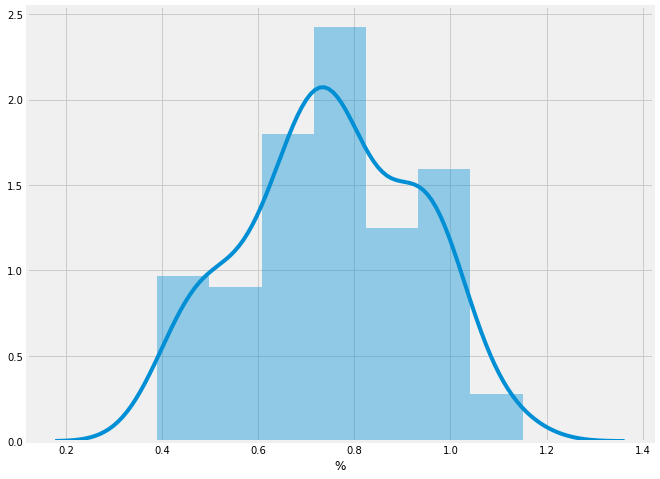

In [54]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(distribution['%'])
plt.savefig('Frequency_Histogram.png')